### Import Libraries

In [23]:
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

### Init

In [ ]:
seed = 42, num_classes = 2

keypoints = 'model/keypoint_classifier/keypoint.csv'
model_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

### Read & Split Data

In [26]:
X_keypoints = np.loadtxt(keypoints, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
Y_keypoints = np.loadtxt(keypoints, delimiter=',', dtype='int32', usecols=(0))

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X_keypoints, Y_keypoints, train_size=0.7, random_state=seed)

### Model

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21*2,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_4 (Dropout)         (None, 42)                0         
                                                                 
 dense_6 (Dense)             (None, 20)                860       
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 2)                 22        
                                                                 
Total params: 1,092
Trainable params: 1,092
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(model_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [32]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [33]:
model.fit(
    X_train,
    Y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, Y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/18 [>.............................] - ETA: 8s - loss: 0.8349 - accuracy: 0.4688
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 1s 17ms/step - loss: 0.7353 - accuracy: 0.5141 - val_loss: 0.6745 - val_accuracy: 0.4263
Epoch 2/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.6807 - accuracy: 0.5781
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 5ms/step - loss: 0.6743 - accuracy: 0.5791 - val_loss: 0.5944 - val_accuracy: 0.8515
Epoch 3/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.6578 - accuracy: 0.5781
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 6ms/step - loss: 0.6175 - accuracy: 0.6614 - val_loss: 0.5288 - val_accuracy: 0.9671
Epoch 4/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.6014 - accuracy: 0.6719


 1/18 [>.............................] - ETA: 0s - loss: 0.1090 - accuracy: 0.9531
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 5ms/step - loss: 0.1582 - accuracy: 0.9418 - val_loss: 0.0181 - val_accuracy: 1.0000
Epoch 56/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.1122 - accuracy: 0.9609
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 4ms/step - loss: 0.1590 - accuracy: 0.9395 - val_loss: 0.0188 - val_accuracy: 1.0000
Epoch 57/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.1559 - accuracy: 0.9531
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 4ms/step - loss: 0.1445 - accuracy: 0.9464 - val_loss: 0.0170 - val_accuracy: 1.0000
Epoch 58/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.1750 - accuracy: 0.9062
Epoch 58

 1/18 [>.............................] - ETA: 0s - loss: 0.1159 - accuracy: 0.9609
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 4ms/step - loss: 0.1074 - accuracy: 0.9614 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 110/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0681 - accuracy: 0.9609
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 5ms/step - loss: 0.1088 - accuracy: 0.9618 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 111/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.1295 - accuracy: 0.9688
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 4ms/step - loss: 0.0986 - accuracy: 0.9614 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 112/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0827 - accuracy: 0.9766
Ep

Epoch 136/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0697 - accuracy: 0.9766
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 5ms/step - loss: 0.0800 - accuracy: 0.9714 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 137/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.1174 - accuracy: 0.9688
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 6ms/step - loss: 0.0918 - accuracy: 0.9695 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 138/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0943 - accuracy: 0.9766
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 4ms/step - loss: 0.0830 - accuracy: 0.9732 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 139/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.1618 - accu

Epoch 163/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.1130 - accuracy: 0.9609
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 5ms/step - loss: 0.0721 - accuracy: 0.9741 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 164/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0351 - accuracy: 0.9922
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 5ms/step - loss: 0.0598 - accuracy: 0.9773 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 165/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0653 - accuracy: 0.9844
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
18/18 [==============================] - 0s 5ms/step - loss: 0.0603 - accuracy: 0.9786 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 166/1000
 1/18 [>.............................] - ETA: 0s - loss: 0.0778 - accu

### Evaluate

In [34]:
val_loss, val_acc = model.evaluate(X_test, Y_test, batch_size=128)

8/8 [==============================] - 0s 932us/step - loss: 0.0080 - accuracy: 1.0000


In [35]:
# Load saved model
model = tf.keras.models.load_model(model_path)

In [36]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[0.00775896 0.992241  ]
1


#### Confusion matrix

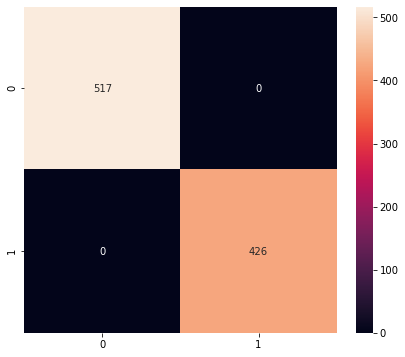

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       517
           1       1.00      1.00      1.00       426

    accuracy                           1.00       943
   macro avg       1.00      1.00      1.00       943
weighted avg       1.00      1.00      1.00       943



In [37]:
Y_pred = model.predict(X_test)
Y_pred = np.argmax(Y_pred, axis=1)

labels = sorted(list(set(Y_test)))
cmx_data = confusion_matrix(Y_test, Y_pred, labels=labels) 
df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
ax.set_ylim(len(set(Y_test)), 0)
plt.show()

print('Classification Report')
print(classification_report(Y_test, Y_pred))

### TFLite Model

In [38]:
# For inference
model.save(model_path, include_optimizer=False)

In [39]:
# Transform model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmpxosp0fk0\assets


6336

### Inference test

In [40]:
interpreter = tf.lite.Interpreter(model_path=tflite_path)
interpreter.allocate_tensors()

In [41]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [42]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [43]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [44]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.00775896 0.992241  ]
1
